100%|███████████████████████████████████████| 1001/1001 [00:28<00:00, 35.37it/s]


Elapsed time: 00:00:28


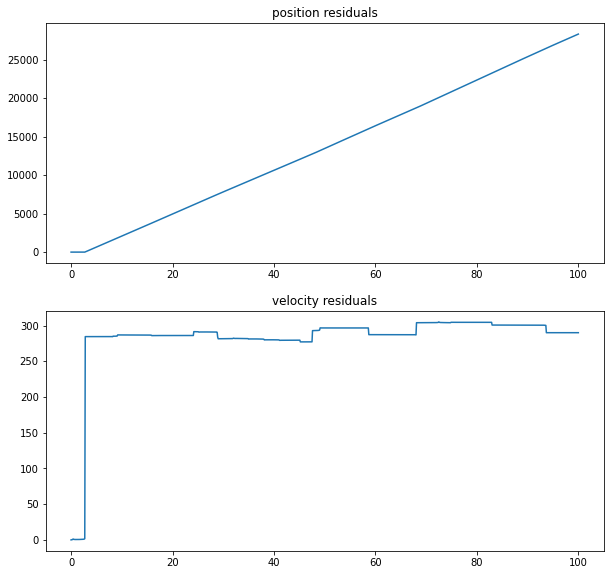

In [4]:
from experiments import Experiment

import sys
import time
import matplotlib.pyplot as plt

sys.setrecursionlimit(10**6) #for barnes hut

experiment = Experiment()
pos_res, vel_res, ts, elap_time = experiment.run(30, 100, 1000)
print('Elapsed time:', time.strftime('%H:%M:%S', time.gmtime(elap_time)))

f = plt.figure(figsize=(10,15))

ax1 = f.add_subplot(311)
ax1.set_title('position residuals')
ax1.plot(ts, pos_res)

ax2 = f.add_subplot(312, sharex=ax1)
ax2.set_title('velocity residuals')
ax2.plot(ts, vel_res)

plt.show()

# VISUALIZATION

In [5]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

data = np.moveaxis(np.array(experiment.group.history), 0, 1)

/tmp/ipykernel_12437/347606920.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


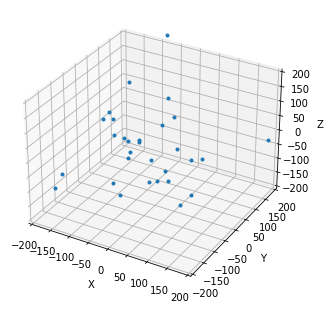

In [6]:
# data: list of frames
# frame: list of dots
# dot: list of coordinates

fig = plt.figure()
ax = p3.Axes3D(fig)

h = ax.plot(*data[0].T, marker='.', linestyle='None')[0]

ax.set_xlim3d([-200.0, 200.0])
ax.set_xlabel('X')

ax.set_ylim3d([-200.0, 200.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-200.0, 200.0])
ax.set_zlabel('Z')
plt.show()

def update_particles(frame):
    # Plot the iterations up to num for all particles
    h.set_xdata(data[frame, :, 0].ravel())
    h.set_ydata(data[frame, :, 1].ravel())
    h.set_3d_properties(data[frame, :, 2].ravel())
    return h

anim = animation.FuncAnimation(fig, update_particles, frames=len(data), 
                                    interval=10)
HTML(anim.to_html5_video())

DEBUG

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 4766.25it/s]


<IPython.core.display.Javascript object>


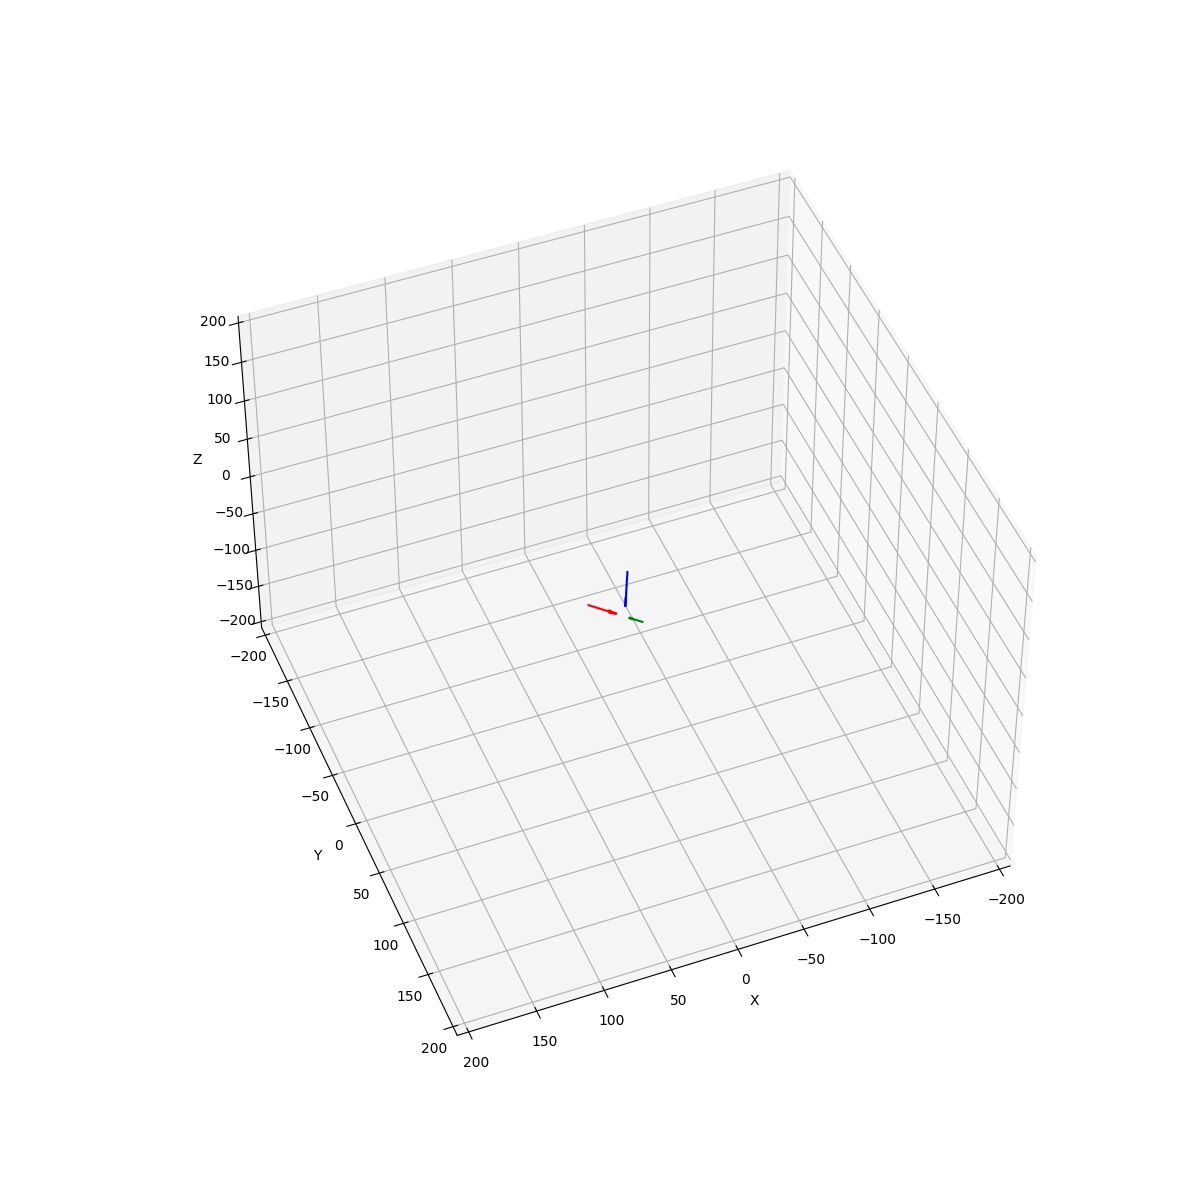

In [1]:
from experiments import Experiment
from BH_Tree import OctTree

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

experiment = Experiment()
pos_res, vel_res, ts, elap_time = experiment.run(3, 0, 1)

group = experiment.group

group.dots[0].mass = 100
group.dots[1].mass = 100
group.dots[2].mass = 100

group.dots[0].position = np.array([30, 0, 0])
group.dots[1].position = np.array([0, 30, 0])
group.dots[2].position = np.array([0, 0, 30])

#get bounds for tree:
m = max(group.get_max_coords())
#build octo tree
group.Q=OctTree(group.dots,m,-m,m,-m,m,-m)

dots = []
accs = []
#update dots velocities
for dot in group.dots:
    acceleration=group.Q.forces(dot,1)
    dots.append(dot.position)
    accs.append(acceleration)

ax = plt.figure(figsize=(12, 12), dpi=80).add_subplot(projection='3d')

mult = 200
ax.quiver(dots[0][0], dots[0][1], dots[0][2], accs[0][0], accs[0][1], accs[0][2], length=mult, colors='r')
ax.quiver(dots[1][0], dots[1][1], dots[1][2], accs[1][0], accs[1][1], accs[1][2], length=mult, colors='g')
ax.quiver(dots[2][0], dots[2][1], dots[2][2], accs[2][0], accs[2][1], accs[2][2], length=mult, colors='b')

ax.set_xlim3d([-200.0, 200.0])
ax.set_xlabel('X')

ax.set_ylim3d([-200.0, 200.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-200.0, 200.0])
ax.set_zlabel('Z')

plt.show()